In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('movies.csv', encoding='latin-1')
print("=== MOVIE DATASET INFO ===")
print(f"Total movies: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 movies:")
print(df[['title_x', 'genres', 'imdb_rating']].head())

=== MOVIE DATASET INFO ===
Total movies: 1629
Columns: ['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y', 'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres', 'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors', 'wins_nominations', 'release_date']

First 5 movies:
                                title_x            genres  imdb_rating
0              Uri: The Surgical Strike  Action|Drama|War          8.4
1                         Battalion 609               War          4.1
2  The Accidental Prime Minister (film)   Biography|Drama          6.1
3                       Why Cheat India       Crime|Drama          6.0
4                       Evening Shadows             Drama          7.3


In [ ]:
print("\n=== RATING ANALYSIS ===")
print(f"Highest rating: {df['imdb_rating'].max()}")
print(f"Lowest rating: {df['imdb_rating'].min()}")
print(f"Average rating: {df['imdb_rating'].mean():.2f}")



=== RATING ANALYSIS ===
Highest rating: 9.4
Lowest rating: 0.0
Average rating: 5.56



=== TOP 10 HIGH RATED MOVIES ===
                         title_x  imdb_rating
41          Family of Thakurganj          9.4
1628                    Humsafar          9.0
62                Saand Ki Aankh          8.9
58             Ghost (2019 film)          8.7
1435  Final Solution (2003 film)          8.7
192     Sachin: A Billion Dreams          8.6
1058    Black Friday (2007 film)          8.5
0       Uri: The Surgical Strike          8.4
53                   Section 375          8.4
146                    Andhadhun          8.4


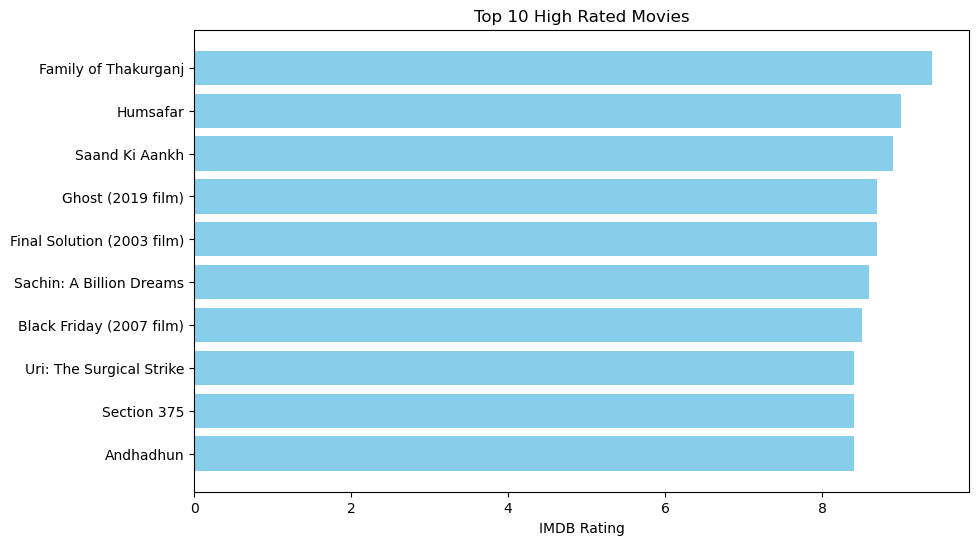

In [ ]:
print("\n=== TOP 10 HIGH RATED MOVIES ===")
top_movies = df.nlargest(10, 'imdb_rating')[['title_x', 'imdb_rating']]
print(top_movies)
plt.figure(figsize=(10, 6))
plt.barh(top_movies['title_x'], top_movies['imdb_rating'], color='skyblue')
plt.xlabel('IMDB Rating')
plt.title('Top 10 High Rated Movies')
plt.gca().invert_yaxis()
plt.show()


=== GENRE ANALYSIS ===


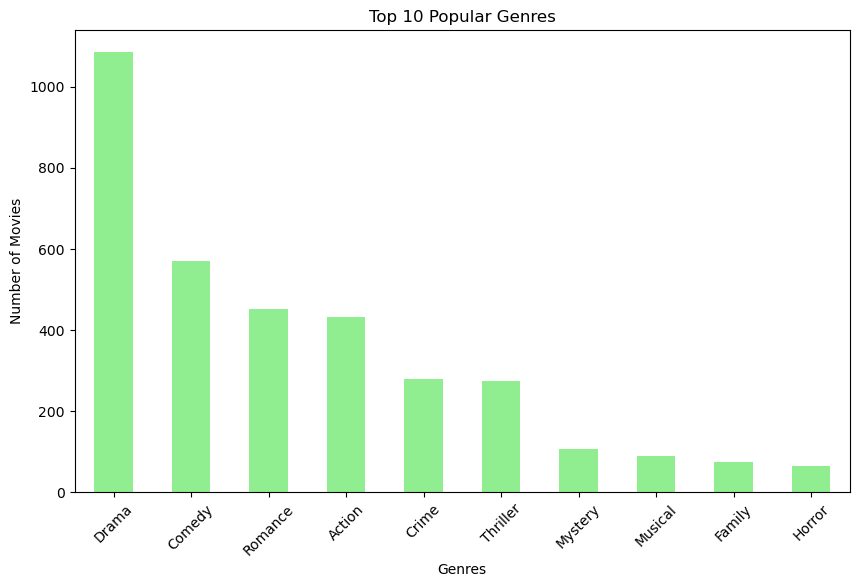

In [ ]:
print("\n=== GENRE ANALYSIS ===")
all_genres = []
for genres in df['genres'].dropna():
    all_genres.extend(genres.split('|'))
genre_count = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10, 6))
genre_count.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def simple_recommend():
    print("\n=== SIMPLE MOVIE RECOMMENDATION ===")
    print("Available genres: Drama, Comedy, Action, Romance, Thriller, Horror")
    
    genre = input("Enter your favorite genre: ").title()
    genre_movies = df[df['genres'].str.contains(genre, na=False)]
    if len(genre_movies) > 0:
        print(f"\nTop 5 {genre} movies:")
        recommendations = genre_movies.nlargest(5, 'imdb_rating')[['title_x', 'imdb_rating', 'genres']]
        print(recommendations)
        plt.figure(figsize=(10, 6))
        plt.barh(recommendations['title_x'], recommendations['imdb_rating'], color='orange')
        plt.title(f'Top 5 {genre} Movies')
        plt.xlabel('IMDB Rating')
        plt.show()
    else:
        print("Sorry, no movies found for this genre!")


=== YEAR-WISE MOVIE RELEASE ===


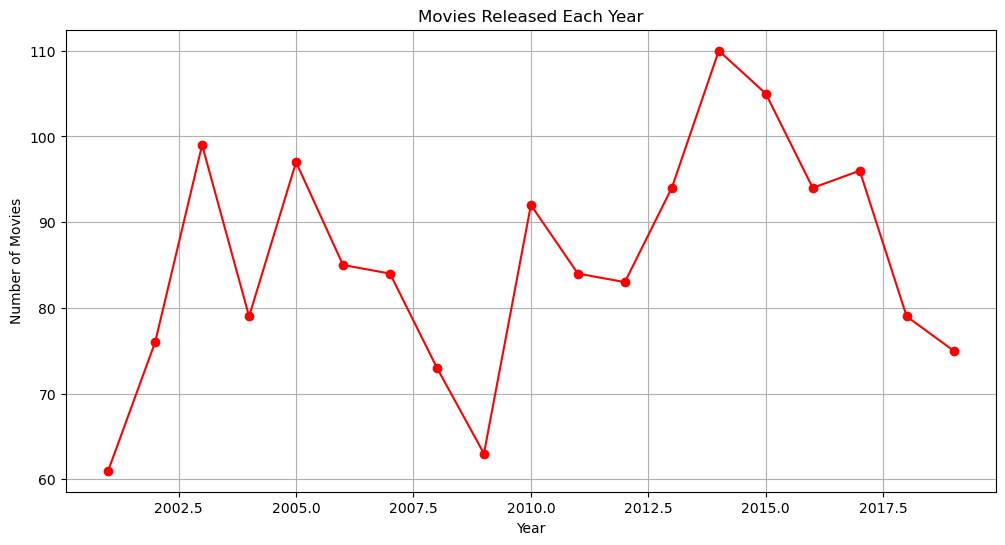

In [ ]:
print("\n=== YEAR-WISE MOVIE RELEASE ===")
year_count = df['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
year_count.plot(kind='line', marker='o', color='red')
plt.title('Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


=== RATING DISTRIBUTION ===


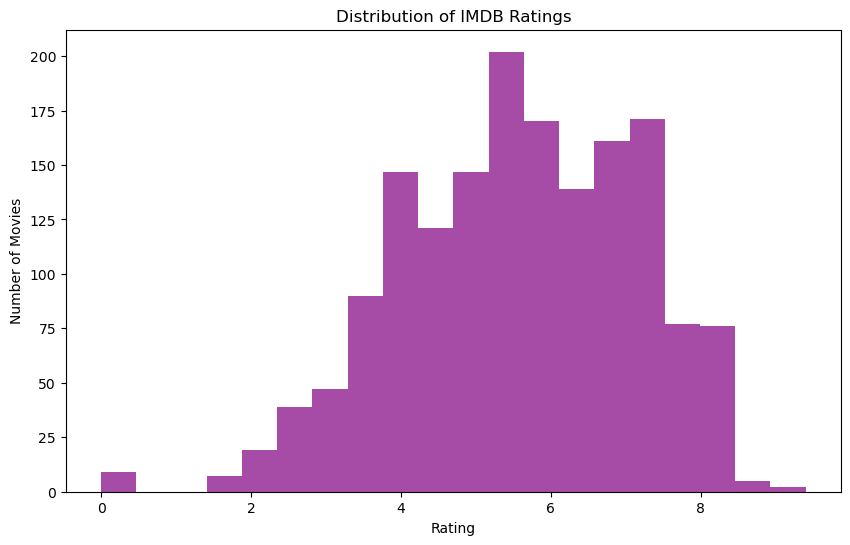

In [ ]:
print("\n=== RATING DISTRIBUTION ===")
plt.figure(figsize=(10, 6))
plt.hist(df['imdb_rating'].dropna(), bins=20, color='purple', alpha=0.7)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
simple_recommend()

# Extra: Simple search
print("\n=== MOVIE SEARCH ===")
search = input("Enter movie name to search: ")
found = df[df['title_x'].str.contains(search, case=False, na=False)]

if len(found) > 0:
    print("\nFound movies:")
    print(found[['title_x', 'imdb_rating', 'genres']].head())
else:
    print("Movie not found!")


=== SIMPLE MOVIE RECOMMENDATION ===
Available genres: Drama, Comedy, Action, Romance, Thriller, Horror


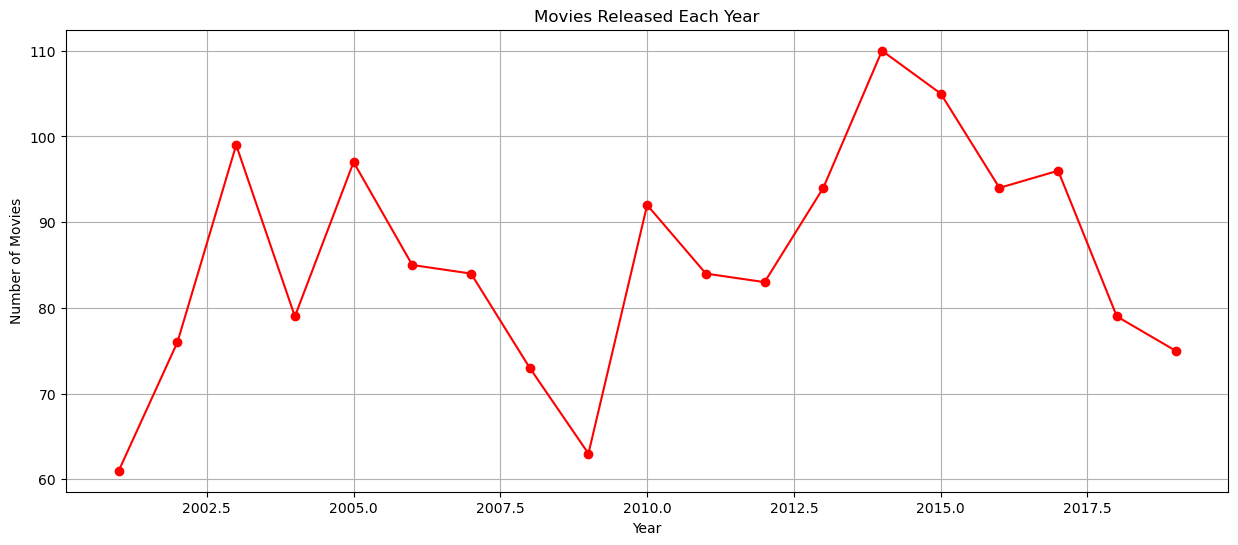

In [ ]:
# Year-wise movie count
year_counts = df['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
year_counts.plot(kind='line', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies Released Each Year')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['votes'], alpha=0.5, color='purple')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Votes')
plt.title('Rating vs Votes')
plt.show()

In [ ]:
df.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')